<h1><center>MSIN0097 Individual Coursework <br>End-to-end Machine Learning Problem</center></h1>
<h2><center>Detecting malicious URLs using different ML models</center></h2>

Please find the link to my GitHub with a copy of the Notebook in its original .ipynb format.<br>
I have also added you as collaborators in my Faculty project called

1981 words

## Table of Contents

* [Section 1](#section1): Problem Framing
* [Section 2](#section2): Get the Data
    * [2.1](#2_1): Setup
    * [2.2](#2_2): Load the data
    * [2.3](#2_3): Data structure
* [Section 3](#section3): Explore the data to gain insights
    * [3.1](#3_1): Feature Engineering
    * [3.2](#3_2): Looking for correlations
* [Section 4](#section4): Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
    * [4.1](#4_1): Handling Text and Categorical Attributes
    * [4.2](#4_2): Create a test set
    * [4.3](#4_3): Feature Scaling Train Set
    * [4.4](#4_4): Feature Scaling Test Set
* [Section 5](#section5): Explore different models and shortlist the best ones.
    * [5.1](#5_1): Logistic Regression
    * [5.2](#5_2): DecisionTreeClassifier
    * [5.3](#5_3): Random Forest
    * [5.4](#5_4): K-Nearest Neighbors Classifier
    * [5.5](#5_5): Comparison
* [Section 6](#section6): Fine-tune your models and combine them into a better solution.
    * [6.1](#6_1): Random Grid Search
    * [6.2](#6_2): Grid Search
    * [6.3](#6_3): Voting Classifier (Ensemble)
    * [6.4](#6_4): Comparison of the fine-tuned models
* [Section 7](#section7): Present your final solution with any summary conclusions.


## Section 1: <a class="anchor" id="section1"></a> Problem Framing

Nowadays, cyber attacks are very common. "35% of the 10,500 organizations analyzed were targeted by at least one phishing attack in September 2021" [[1]](#References). Therefore, it's better to be proactive than reactive. 

The current existing solutions for this cyber issue can be antivirus software which have their own algorithm and block user's access to a phishing website. A manual solution to this problem can be by training employees at a company to understand potential malware, defacement and/or phishing URLs.

The objective of this project is to build a model from different URLs which will accurately predict their type (e.g. benign, malware, etc.). The solution of this project can then be used as the backend code of a UI which can inform the user if the inputted URL is safe (benign) or not.

This is a supervised machine learning problem as input data (URLs) is provided to the model along with the output (type of the URLs).


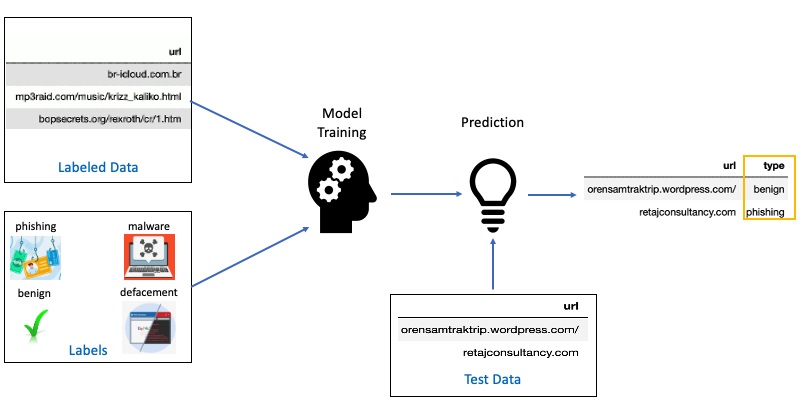

In [394]:
import base64, io, IPython
from PIL import Image as PILImage

image = PILImage.open("./images/supervised_graph.png")

output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

A URL is composed by different parts (as showed below). Each one of them can be changed by a hacker to confuse a user to click on the URL. This project will analyse different attributes of a URL (i.e. url length, digits count) to find a model which will accurately predict their type. 


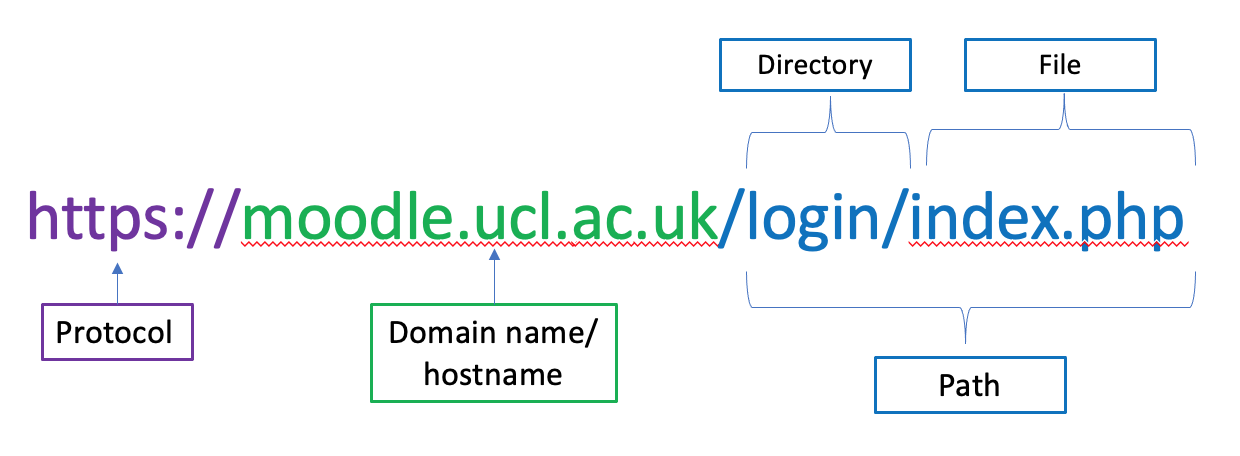

In [395]:
import base64, io, IPython
from PIL import Image as PILImage

image = PILImage.open("./images/url_parts.png")

output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

The performance of this project will be measured by comparing different machine learning models to see which one produces more accurate results. The minimum performance neeeded to reach the business objective would be an accuracy of 85%.

## Section 2: <a class="anchor" id="section2"></a> Get the data

### 2.1 <a class="anchor" id="2_1"></a> Setup

We firstly need to import a few common modules and ensure the right versions of Python and Scikit-Learn.

In [173]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#for the URLs
from urllib.parse import urlparse

#to ignore/remove the warning messages
import warnings
warnings.simplefilter('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "/project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "graphs")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    #if tight_layout:
     #   plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### 2.2 <a class="anchor" id="2_2"></a> Load the data

The data was obtained from Kaggle [[2]](#References) which is a mix of benign/safe URLs, defacement URLs, phishing URLs and malware ones collected from 5 different sources. 


In [2]:
df = pd.read_csv("malicious_phish.csv")

In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


### 2.3 <a class="anchor" id="2_3"></a> Data Structure

In [4]:
#Check what our dataset consists of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [5]:
#Check the summary of the numerical values
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [6]:
#Check if there are any null values
df.isnull().sum()

url     0
type    0
dtype: int64

We can observe, that there are two columns so far in the dataset and 651,191 instances. There are no missing values and all attributes' type is object. The values in the *type* column are repetitive showing that it's a categorical attribute. There are 4 categories (so 4 types of URLs).

In [7]:
#Count the values for each type
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Saving figure initial_data


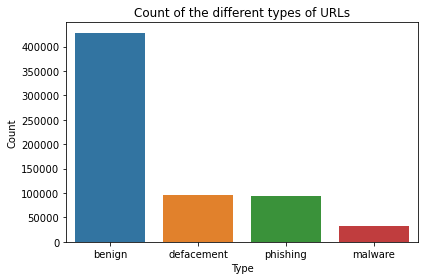

In [8]:
#Visualise it in a bar plot
ax = sns.countplot(x="type", 
              data=df, 
              order = df['type'].value_counts(ascending=False).index
             )
_ = ax.set_xlabel("Type")
_ = ax.set_ylabel("Count")
_ = ax.set_title("Count of the different types of URLs")

save_fig("initial_data")

## Section 3: <a class="anchor" id="section3"></a> Explore the data to gain insights

This dataset requires further manipulations and feature engineering before gaining better insights.

### 3.1 <a class="anchor" id="3_1"></a> Feature Engineering

Need to create a few more columns to better analyse each URL and to have more features. 

In [9]:
#New column which counts the length of the URL for each row
df["url_length"] = df["url"].str.len() 
df.head()

,url,type,url_length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [11]:
# Counting the times http: and https: appear per URL
df['count_http'] = [x.count('http:') for x in df['url']]
df['count_https'] = [x.count('https:') for x in df['url']]

An other column is created to show if HTTPS is present or not as in some URLs, https is present more than 1 time too. 

In [12]:
#Parse URLs into components -- https://docs.python.org/3/library/urllib.parse.html
#checking the protocol of the URL (either HTTP or HTTPS) to see if it exists
def https(o):
    https = urlparse(o).scheme
    string_https = str(https)
    if string_https=='https':
        return 1 #means https is present 
    else:
        return 0 #means https is not present 

In [13]:
#adding it to the main dataframe
df['https'] = [https(x) for x in df["url"]]
df.head()


,url,type,url_length,count_http,count_https,https
0,br-icloud.com.br,phishing,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1,0,0


Saving figure presence_of_https


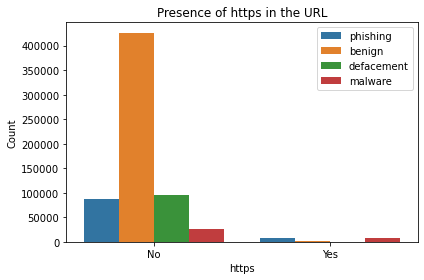

In [14]:
ax = sns.countplot(x='https', data=df, hue="type");
ticks = ["No", "Yes"]
_ = ax.set_xticklabels(ticks)
_ = ax.set_title("Presence of https in the URL")
_ = ax.set_xlabel("https")
_ = ax.set_ylabel("Count")
_ = plt.legend(loc='upper right')

save_fig("presence_of_https")

In [15]:
#Parse URLs into components -- https://docs.python.org/3/library/urllib.parse.html
#checking the length of the hostname/domain
df['domain_length'] = [len(urlparse(x).netloc) for x in df['url']]
df.head()


,url,type,url_length,count_http,count_https,https,domain_length
0,br-icloud.com.br,phishing,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,0,0,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1,0,0,23


In [16]:
#Counting different features
df['count_dots'] = [x.count('.') for x in df['url']]
df['count_www'] = [x.count('www.') for x in df['url']]
df['count_dot_com'] = [x.count('.com') for x in df['url']]
df['count_index'] = [x.count('index') for x in df['url']]
df['count_html'] = [x.count('html') for x in df['url']]

In [17]:
#Counting more characters
df['count_question'] = [x.count('?') for x in df['url']]
df['count_equal'] = [x.count('=') for x in df['url']]
df['count_underscore'] = [x.count('_') for x in df['url']]
df['count_dash'] = [x.count('-') for x in df['url']]
df['count_doubleslash'] = [x.count('//') for x in df['url']]
df['count_backslash'] = [x.count('\\') for x in df['url']]
df['count_hashtag'] = [x.count('#') for x in df['url']]
df['count_plus'] = [x.count('+') for x in df['url']]
df['count_percentage'] = [x.count('%') for x in df['url']]
df['count_at_sign'] = [x.count('@') for x in df['url']]
df['count_space'] = [x.count(' ') for x in df['url']]
df.head()

,url,type,url_length,count_http,count_https,https,domain_length,count_dots,count_www,count_dot_com,...,count_equal,count_underscore,count_dash,count_doubleslash,count_backslash,count_hashtag,count_plus,count_percentage,count_at_sign,count_space
0,br-icloud.com.br,phishing,16,0,0,0,0,2,0,1,...,0,0,1,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,1,...,0,1,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,0,0,21,3,1,0,...,4,2,1,1,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1,0,0,23,2,0,0,...,3,1,1,1,0,0,0,0,0,0


In [18]:
count_of_digits = []
count_of_letters = []
count_of_non_alphanumeric = []

for x in df['url']:
    count_of_digits.append(sum(z.isdigit() for z in x))
    count_of_letters.append(sum(z.isalpha() for z in x))
    count_of_non_alphanumeric.append(sum(not z.isalnum() for z in x))


df["count_of_digits"] = count_of_digits
df["count_of_letters"] = count_of_letters
df["count_of_non_alphanumeric"] = count_of_non_alphanumeric
df.head()

,url,type,url_length,count_http,count_https,https,domain_length,count_dots,count_www,count_dot_com,...,count_doubleslash,count_backslash,count_hashtag,count_plus,count_percentage,count_at_sign,count_space,count_of_digits,count_of_letters,count_of_non_alphanumeric
0,br-icloud.com.br,phishing,16,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,13,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,1,29,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,25,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,0,0,21,3,1,0,...,1,0,0,0,0,0,0,7,63,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1,0,0,23,2,0,0,...,1,0,0,0,0,0,0,22,199,14


### 3.2 <a class="anchor" id="3_2"></a> Looking for correlations

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

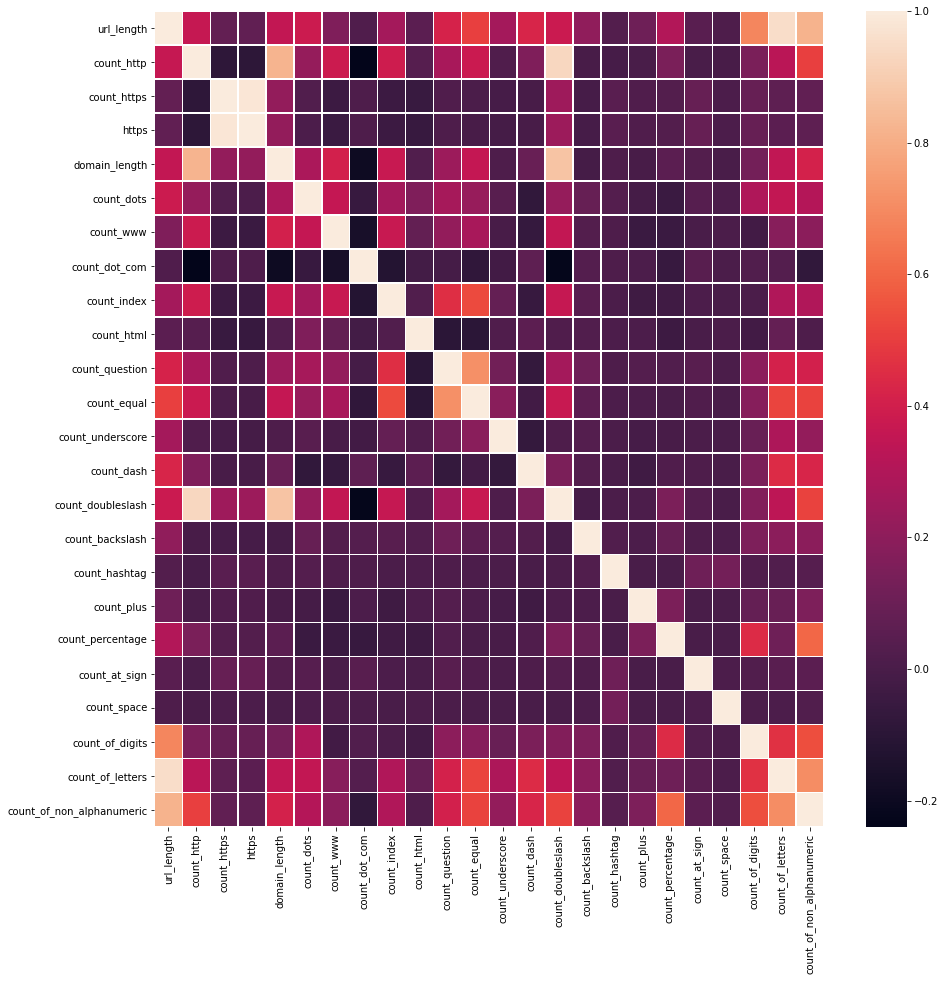

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [24]:
corr_matrix = df.corr()
corr_matrix

,url_length,count_http,count_https,https,domain_length,count_dots,count_www,count_dot_com,count_index,count_html,...,count_doubleslash,count_backslash,count_hashtag,count_plus,count_percentage,count_at_sign,count_space,count_of_digits,count_of_letters,count_of_non_alphanumeric
url_length,1.000000,0.362476,0.079591,0.072201,0.354189,0.382767,0.159799,0.017601,0.268490,0.052808,...,0.377295,0.210612,0.028476,0.113847,0.304816,0.049206,0.013410,0.686800,0.954401,0.820722
count_http,0.362476,1.000000,-0.087403,-0.091839,0.823687,0.223438,0.380378,-0.239566,0.389234,0.038191,...,0.936176,-0.004342,-0.011494,0.001992,0.145725,0.002387,-0.004675,0.147468,0.331289,0.504879
count_https,0.079591,-0.087403,1.000000,0.984883,0.217479,0.025827,-0.042365,0.016234,-0.042049,-0.052491,...,0.249241,-0.007150,0.046188,0.017155,0.029774,0.089075,0.008912,0.085575,0.062861,0.071938
https,0.072201,-0.091839,0.984883,1.000000,0.218280,0.011332,-0.047738,0.012286,-0.044141,-0.055697,...,0.244614,-0.008589,0.047210,0.017801,0.030007,0.089152,0.008528,0.086184,0.054416,0.063050
domain_length,0.354189,0.823687,0.217479,0.218280,1.000000,0.285763,0.407208,-0.193097,0.367465,0.026160,...,0.873297,-0.012579,0.012712,-0.006366,0.054787,0.029241,-0.000474,0.126791,0.350609,0.411950
count_dots,0.382767,0.223438,0.025827,0.011332,0.285763,1.000000,0.359155,-0.058686,0.260992,0.161858,...,0.222487,0.088327,0.035473,-0.015390,-0.046009,0.037445,0.011653,0.295856,0.354305,0.309443
count_www,0.159799,0.380378,-0.042365,-0.047738,0.407208,0.359155,1.000000,-0.159643,0.365725,0.077680,...,0.355012,0.028969,0.014692,-0.047808,-0.046037,-0.001427,0.003289,-0.024323,0.186229,0.194276
count_dot_com,0.017601,-0.239566,0.016234,0.012286,-0.193097,-0.058686,-0.159643,1.000000,-0.119238,-0.021030,...,-0.228924,0.034793,0.013998,0.011821,-0.060208,0.041295,0.005112,0.025395,0.035585,-0.079714
count_index,0.268490,0.389234,-0.042049,-0.044141,0.367465,0.260992,0.365725,-0.119238,1.000000,0.023538,...,0.361592,0.044108,0.004901,-0.033080,-0.031074,0.008548,0.002021,0.006050,0.302475,0.298854
count_html,0.052808,0.038191,-0.052491,-0.055697,0.026160,0.161858,0.077680,-0.021030,0.023538,1.000000,...,0.019550,0.025981,0.010844,0.008996,-0.036938,-0.002028,0.004019,-0.025520,0.080489,0.014646


From the correlation matrix, we can see that there is a high positive correlation between the double slashes (//) and the HTTP word which makes sense as most of the times HTTP is followed with double slashes. 
There is also another high positive correlation between the count_of_letters and count_of_non_alphanumeric features with the url_length.

## Section 4: <a class="anchor" id="section4"></a> Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.

Checking the most lengthy URL and the less lengthy URL to discover the data a bit more.

In [25]:
column = df["url_length"]

max_index = column.idxmax()
print(max_index, "is the max url_length index")

min_index = column.idxmin()
print(min_index, "is the min url_length index")

579857 is the max url_length index
573437 is the min url_length index


In [26]:
df.loc[(max_index)]
df.loc[(min_index)]

url                          peekaboopoles.co.uk/holding/payza.com/accounts...
type                                                                    benign
url_length                                                                2175
count_http                                                                   0
count_https                                                                  0
https                                                                        0
domain_length                                                                0
count_dots                                                                  13
count_www                                                                    0
count_dot_com                                                                1
count_index                                                                  0
count_html                                                                   0
count_question                                      

url                                 
type                         phishing
url_length                          1
count_http                          0
count_https                         0
https                               0
domain_length                       0
count_dots                          0
count_www                           0
count_dot_com                       0
count_index                         0
count_html                          0
count_question                      0
count_equal                         0
count_underscore                    0
count_dash                          0
count_doubleslash                   0
count_backslash                     0
count_hashtag                       0
count_plus                          0
count_percentage                    0
count_at_sign                       0
count_space                         0
count_of_digits                     0
count_of_letters                    0
count_of_non_alphanumeric           1
Name: 573437

In [361]:
#displaying the longest URL of the dataset
list_url = list(df['url'][579857])
print("".join(list_url))

peekaboopoles.co.uk/holding/payza.com/accounts/underhold.hild.frozen/money.hold/unhold.accounts.code/securty.code.code/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmndsabfmnbdsmnfbndsabfmnbdsmnfdgdfsgfdgdsgfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbmdsafsdafdsfasdfsdfsdfasndsabfmnbdsmnfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfb/ewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfb/eewrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmndsabfmnbdsmnfbwrlksndafnlkqwkenwkjhjesjnasfmkdsbfndsnabfjhsadgrfujhadsjkfnwernbmasbmndbsmnbsamnfbdsmnfbsdafsadfadsfsafsdafdsfsadvvmn/eewr

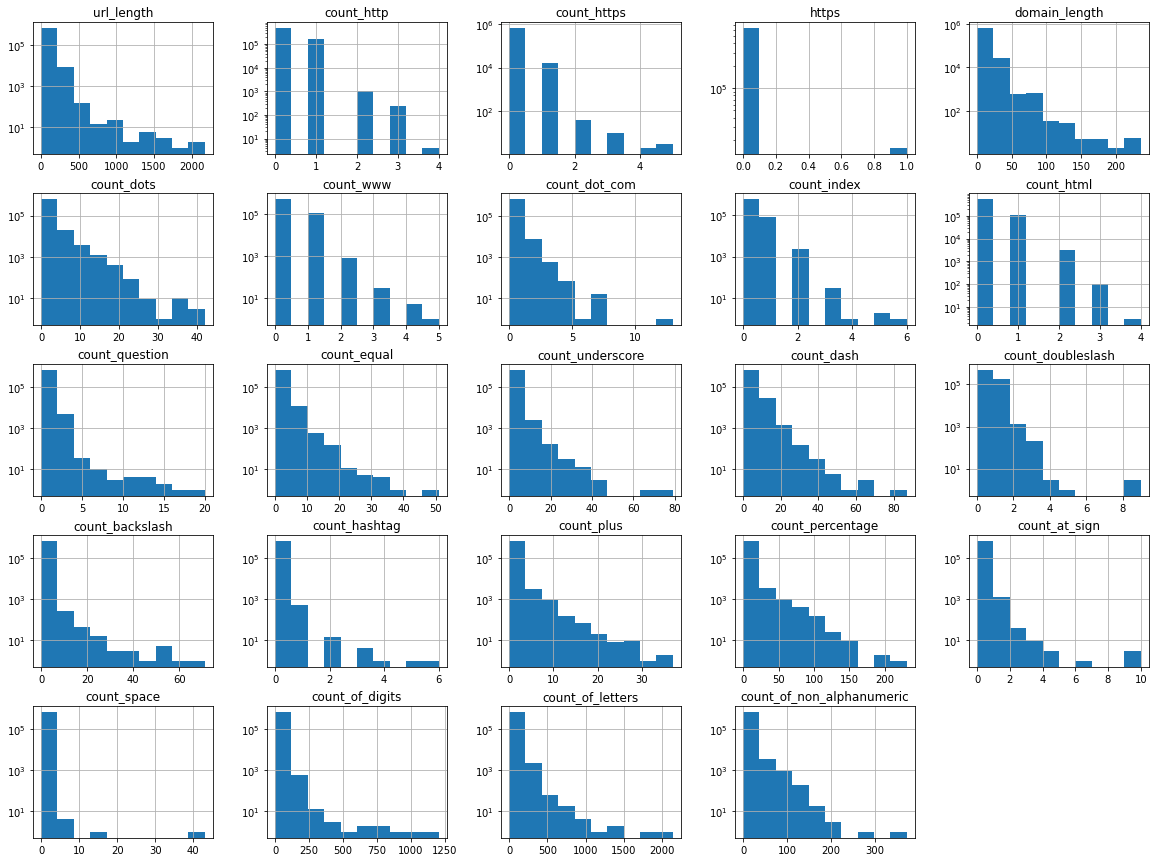

In [366]:
_ = df.hist(bins=10, figsize=(20,15), log=True)
#save_fig("attribute_histogram_plots")
plt.show()

 We can notice a few things about these histograms:<br>
1. First of all, the attributes have different scales. This will be fixed in section 4.3 where feature scalling will be used. To plot the histograms now, the parameter log=True was used.
2. Many histograms are tail-heavy as they extend much farther to the right of the median than to the left. These attributes will be transformed later on to have more bell-shaped distributions.

### 4.1 <a class="anchor" id="4_1"></a> Handling Text and Categorical Attributes

The dataset only includes two categorical columns which are the **url** and the **type**. The *url* is not needed so it will be dropped later on and the *type* column is our predictor so we can't one hot encode (OHE) it. This will lead to an issue of the label (y_train) to compare with itself in the x_train giving us 100% accuracy.<br><br>
For future use of the code, if one wanted to predict on another variable and not on type, the OHE code below could be used. If OHE is used, to avoid multicollinearity issues, one of the columns will need to be dropped. <br><br>
For this project, the type column was used as it is but one could use ordinal encoder as well to have values from 0-4 each one allocated to a type.

In [29]:
df.head()

,url,type,url_length,count_http,count_https,https,domain_length,count_dots,count_www,count_dot_com,...,count_doubleslash,count_backslash,count_hashtag,count_plus,count_percentage,count_at_sign,count_space,count_of_digits,count_of_letters,count_of_non_alphanumeric
0,br-icloud.com.br,phishing,16,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,13,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,1,29,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,25,5
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,0,0,21,3,1,0,...,1,0,0,0,0,0,0,7,63,18
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,1,0,0,23,2,0,0,...,1,0,0,0,0,0,0,22,199,14


<div class="admonition note" name="html-admonition" style="background: lightgrey; padding: 10px">
<p class="title">Code to use for Ordinal Encoder:</p>
</div>

```{note}
url_type = df[["type"]]
url_type.head()

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
url_type_encoded = ordinal_encoder.fit_transform(url_type)
url_type_encoded[:10]
```

<div class="admonition note" name="html-admonition" style="background: lightgrey; padding: 10px">
<p class="title">Code to use for OneHotEncoder:</p>
</div>

```{note}
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
url_type_1hot = cat_encoder.fit_transform(url_type)

```

<div class="admonition note" name="html-admonition" style="background: lightgrey; padding: 10px">
<p class="title">How to add the OneHotEncoder into your dataframe:</p>
</div>

```{note}
#Convert the ndarray to a dataframe and then add it into existing df
df = pd.concat([df, pd.DataFrame(url_type_1hot)], axis=1)
df.head()

#renaming one hot encoding columns 
df = df.rename(columns={0: "benign", 1: "defacement", 
2: "malware", 3: "phishing"})
```

### 4.2 <a class="anchor" id="4_2"></a> Create a test set

Now that the data wrangling process is done, the data needs to be splitted.<br> 

To split the dataset into test/train sets there are different ways. The way chosen in this project is to use each instance's identifier to decide whether or not it should go in the test set. With this solution, we only need to make sure that new data gets added at the end of the dataset and no row gets deleted. The advantage of this is that if the program is run again, it won't generate a different test set.

Source of code: [[3]](#Reference)

In [369]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
df_with_id = df.reset_index()   # adds an `index` column to the dataset
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index") 
#0.2 which represents that we only going to take 20%



Now that the test and train sets are there, we need to split them into data and label. The label is our y value which will only contain the *type* as this is what we want to predict. The data is our x values which are all the other attributes. 

In [42]:
x_train = train_set.drop(columns=["url","type","index"])
y_train = train_set["type"].copy()

x_test = test_set.drop(columns=["url","type","index"])
y_test = test_set["type"].copy()


print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (520948, 24) (520948,)
Testing dataset shape: (130243, 24) (130243,)


In [44]:
print(len(train_set), "train +", len(test_set), "test")

520948 train + 130243 test


To make sure that there is a good representations of categories in the test set, we can check the proportions of both the test set and the normal one.

In [45]:
test_set["type"].value_counts() / len(test_set)

benign        0.658285
defacement    0.147923
phishing      0.144154
malware       0.049638
Name: type, dtype: float64

In [46]:
df["type"].value_counts() / len(df)

benign        0.657415
defacement    0.148124
phishing      0.144521
malware       0.049939
Name: type, dtype: float64

### 4.3 <a class="anchor" id="4_3"></a> Feature Scaling Train Set

As with all transformations, we need to fit the scalers to the training data only and not the full one (including the test set). The training data is splitted into numerical values and categorical values and then combined in a full pipeline.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),])

url_transform_num_tr = num_pipeline.fit_transform(x_train)

In [50]:
url_transform_num_tr

array([[-0.9871455 , -0.59616066, -0.15804338, ..., -0.47429204,
        -1.0215764 , -0.80026426],
       [-0.56255358, -0.59616066, -0.15804338, ..., -0.38861733,
        -0.51474334, -0.54970355],
       [ 0.6218344 ,  1.63144771, -0.15804338, ...,  0.12543092,
         0.56227694,  1.07894108],
       ...,
       [-0.36143109, -0.59616066, -0.15804338, ...,  0.12543092,
        -0.51474334, -0.17386248],
       [-0.40612498, -0.59616066, -0.15804338, ..., -0.21726791,
        -0.38803507, -0.4244232 ],
       [-0.42847192, -0.59616066, -0.15804338, ..., -0.47429204,
        -0.29300387, -0.54970355]])

In [51]:
from sklearn.compose import ColumnTransformer

num_attribs = list(x_train)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)])

x_train = full_pipeline.fit_transform(train_set)

In [52]:
x_train

array([[-0.9871455 , -0.59616066, -0.15804338, ..., -0.47429204,
        -1.0215764 , -0.80026426],
       [-0.56255358, -0.59616066, -0.15804338, ..., -0.38861733,
        -0.51474334, -0.54970355],
       [ 0.6218344 ,  1.63144771, -0.15804338, ...,  0.12543092,
         0.56227694,  1.07894108],
       ...,
       [-0.36143109, -0.59616066, -0.15804338, ...,  0.12543092,
        -0.51474334, -0.17386248],
       [-0.40612498, -0.59616066, -0.15804338, ..., -0.21726791,
        -0.38803507, -0.4244232 ],
       [-0.42847192, -0.59616066, -0.15804338, ..., -0.47429204,
        -0.29300387, -0.54970355]])

In [53]:
x_train.shape

(520948, 24)

### 4.4 <a class="anchor" id="4_4"></a> Feature Scaling Test Set

We need to run the full pipeline on the test set as well but to transform() it only based on the fit which was done on the train set. We shouldn't fit_transform() the test set.

In [54]:
x_test.shape
x_test = full_pipeline.transform(test_set)
x_test.shape

(130243, 24)

In [370]:
# To check if both our datasets contain the same number of columns
x_train.shape
x_test.shape

(520948, 24)

(130243, 24)

## Section 5: <a class="anchor" id="section5"></a> Explore different models and shortlist the best ones.

As it's a classification problem, below classification ML models will be applied and compared to see which one performs better.

### 5.1 <a class="anchor" id="5_1"></a> Logistic Regression

Logistic Regression is using one-vs-rest type of classification. It was used as it involves splitting the multi-class dataset into multiple binary classification problems and it's easy to implement and interpret [[4]](#References).

In [373]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=13).fit(x_train, y_train)


In [60]:
#packages needed for the cross val function and to get the scores
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from statistics import mean

#this package is needed so that we can count how long our model takes to train
import time 


custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro')
                 }

start = time.time()

scores_logisticReg = sklearn.model_selection.cross_validate(
    logisticReg, x_train, y_train,
    cv = 5, scoring = custom_scorer, n_jobs=-1) 
#n_jobs -1 is so that all CPUs get used

#this for loop gets all the scores 
for name in scores_logisticReg.keys():
    average_logisticReg = np.average(scores_logisticReg[name])
    print('%s: %.5f' %(name,average_logisticReg))

stop = time.time()

training_time_logistic = stop - start
print(f"Training_time: {training_time_logistic} seconds")

        

fit_time: 21.37545
score_time: 1.44673
test_accuracy: 0.85317
test_precision: 0.80171
test_recall: 0.73395
Training_time: 114.98488688468933 seconds


In [106]:
#This is to be used for the confusion matrix and comparison graphs
accuracy_logisticReg = []
precision_logisticReg = []
recall_logisticReg = []

for k, v in scores_logisticReg.items():
    if k == 'test_accuracy':
        accuracy_logisticReg.append(v.mean())
    if k == 'test_precision':
        precision_logisticReg.append(v.mean())
    if k == 'test_recall':
        recall_logisticReg.append(v.mean())

print('Accuracy on training set: {}'.format(accuracy_logisticReg))
print('Precision on training set: {}'.format(precision_logisticReg))
print('Recall on training set: {}'.format(recall_logisticReg))


Accuracy on training set: [0.8531714932169969]
Precision on training set: [0.8017097936841531]
Recall on training set: [0.7339525585989575]


Using the basic trained logisticReg to predict on the test set.

In [371]:
#predicting on the test
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

#Creating a classification report with all the scores
predictions_logisticReg = logisticReg.predict(x_test)
print(classification_report(y_test,predictions_logisticReg))

#Extracting only precision and recall scores to be used later on
predict_precision_logisticReg,predict_recall_logisticReg,fscore,support=score(y_test,predictions_logisticReg,average='macro')
print('Precision : {:.5f}'.format(predict_precision_logisticReg))
print('Recall    : {:.5f}'.format(predict_recall_logisticReg))



              precision    recall  f1-score   support

      benign       0.89      0.97      0.93     85737
  defacement       0.88      0.94      0.91     19266
     malware       0.76      0.75      0.75      6465
    phishing       0.76      0.41      0.53     18775

    accuracy                           0.88    130243
   macro avg       0.82      0.77      0.78    130243
weighted avg       0.87      0.88      0.86    130243

Precision : 0.82282
Recall    : 0.76863


In order to better visualise how our basic logisticReg model did on our test set, a confusion matrix is created.

In [88]:
cm1 = confusion_matrix(y_test, predictions_logisticReg)
print(cm1)

#The diagonal elements represent the number of points for which 
#the predicted label is equal to the true label, while off-diagonal 
#elements are those that are mislabeled by the classifier.
predict_accuracy_logisticReg = sum(np.diag(demo))/sum(sum(demo))*100
print('{:.5f} correctly classified after prediction on test set'.format(predict_accuracy_logisticReg))


[[83289   560   365  1523]
 [  524 18092   298   352]
 [  518   497  4863   587]
 [ 8754  1394   895  7732]]
87.51027 correctly classified after prediction on test set


In [374]:
logisticReg.classes_

array(['benign', 'defacement', 'malware', 'phishing'], dtype=object)

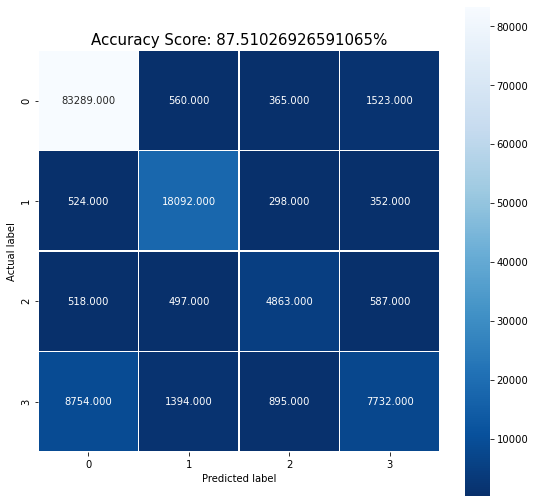

In [375]:
from sklearn import metrics

cm_logisticReg = metrics.confusion_matrix(y_test, predictions_logisticReg)

plt.figure(figsize=(9,9))
sns.heatmap(cm_logisticReg,annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

title_logisticReg = 'Accuracy Score: {}%'.format(predict_accuracy_logisticReg)
plt.title(title_logisticReg, size = 15);



To better understand the labels, another confusion matrix was plotted to make it clear.

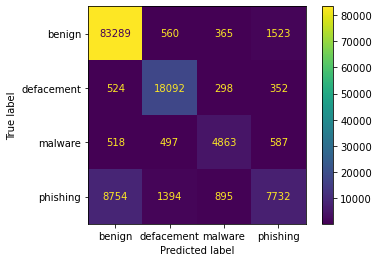

In [376]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cmd = ConfusionMatrixDisplay(cm_logisticReg, 
                             display_labels=['benign', 'defacement','malware','phishing'])
cmd.plot()


Following the **logistic regression model**, we can see that the accuracy after the cross validation on the train set is 85.137% and the model took around 115 seconds to run.<br>
After predicting on test set, the accuracy of correctly classified classes is 87.51027%

### 5.2 <a class="anchor" id="5_2"></a> DecisionTreeClassifier

Decision Tree Classifier is based off decision trees where the branches of the trees are observations which lead to the leaves which are the conclusions or the class labels.

Decision tree classifier is good for multi-class classification tasks. The only thing is that a decision tree classifier is vulnerable to overfitting as it generates nodes to fit the data until the end and doesn't generalize. That's why hyperparameters can help in finding the optimal max_depth.


In [91]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()

decisionTree = DecisionTreeClassifier(random_state=13)
decisionTree.fit(x_train,y_train)

scores_decisionTree = sklearn.model_selection.cross_validate(
    decisionTree, x_train, y_train,
    cv = 5, scoring = custom_scorer)

for name in scores_decisionTree.keys():
    average_decisionTree = np.average(scores_decisionTree[name])
    print('%s: %.5f' %(name,average_decisionTree))
    
stop = time.time()

training_time_decision = stop - start
print(f"Training_time: {training_time_decision} seconds")

    

fit_time: 2.54185
score_time: 1.39280
test_accuracy: 0.92096
test_precision: 0.90895
test_recall: 0.89145
Training_time: 20.536507844924927 seconds


In [105]:
#This is to be used for the confusion matrix and comparison graphs
accuracy_decisionTree = []
precision_decisionTree = []
recall_decisionTree = []

for k, v in scores_decisionTree.items():
    if k == 'test_accuracy':
        accuracy_decisionTree.append(v.mean())
    if k == 'test_precision':
        precision_decisionTree.append(v.mean())
    if k == 'test_recall':
        recall_decisionTree.append(v.mean())
        
print('Accuracy on training set: {}'.format(accuracy_decisionTree))
print('Precision on training set: {}'.format(precision_decisionTree))
print('Recall on training set: {}'.format(recall_decisionTree))


Accuracy on training set: [0.9209611831074843]
Precision on training set: [0.9089467160890552]
Recall on training set: [0.8914530970566265]


Using the basic trained decisionTree to predict on the test set.

In [377]:
#Creating a classification report with all the scores
predictions_decisionTree = decisionTree.predict(x_test)
print(classification_report(y_test,predictions_decisionTree))

#Extracting only precision and recall scores to be used later on
predict_precision_decisionTree,predict_recall_decisionTree,fscore,support=score(y_test,predictions_decisionTree,average='macro')
print('Precision : {:.5f}'.format(predict_precision_decisionTree))
print('Recall    : {:.5f}'.format(predict_recall_decisionTree))


              precision    recall  f1-score   support

      benign       0.97      0.98      0.97     85737
  defacement       0.98      0.98      0.98     19266
     malware       0.95      0.94      0.95      6465
    phishing       0.87      0.82      0.85     18775

    accuracy                           0.96    130243
   macro avg       0.94      0.93      0.94    130243
weighted avg       0.95      0.96      0.95    130243

Precision : 0.94196
Recall    : 0.93115


In order to better visualise how our basic decisionTree model did on our test set, a confusion matrix is created.

In [96]:
cm2 = confusion_matrix(y_test, predictions_decisionTree)
print(cm2)
predict_accuracy_decisionTree = sum(np.diag(cm2))/sum(sum(cm2))*100
print('{:.5f} correctly classified after prediction on test set'.format(predict_accuracy_decisionTree))


[[84045    33    32  1627]
 [   36 18885    39   306]
 [   52    46  6096   271]
 [ 2721   379   257 15418]]
95.54755 correctly classified after prediction on test set


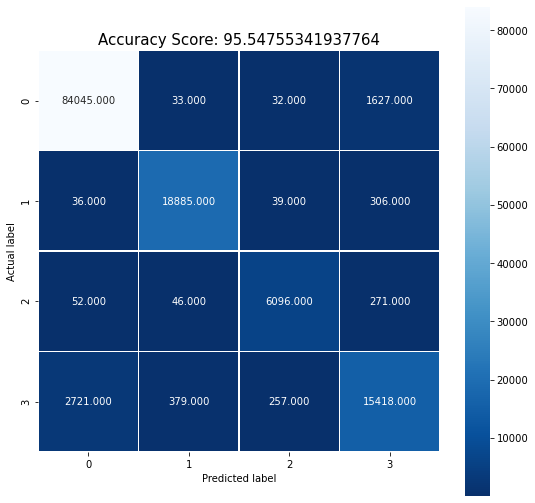

In [97]:
cm_decisionTree = metrics.confusion_matrix(y_test, predictions_decisionTree)

plt.figure(figsize=(9,9))
sns.heatmap(cm_decisionTree, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
decisionTree_title = 'Accuracy Score: {0}'.format(predict_accuracy_decisionTree)
plt.title(decisionTree_title, size = 15);


Following the **Decision tree model**, we can see that the accuracy after the cross validation on the train set is 92.096% and the model took around 21 seconds to run which is quite fast.<br>
After predicting on test set, the accuracy of correctly classified classes is 95.54755%

### 5.3 <a class="anchor" id="5_3"></a> Random Forest

Random Forests is an ensamble learning algorithm where multiple decision trees are generated and classification is performed on each. The most outputted  class from each tree for classification is then used as the final prediction.

In [108]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

RFClassifier = RandomForestClassifier(random_state=13)
RFClassifier.fit(x_train,y_train)

scores_RFClassifier = sklearn.model_selection.cross_validate(
    RFClassifier, x_train, y_train,
    cv = 5, scoring = custom_scorer, n_jobs=-1)

for name in scores_RFClassifier.keys():
    average_RFClassifier = np.average(scores_RFClassifier[name])
    print('%s: %.5f' %(name,average_RFClassifier))


stop = time.time()

training_time_rf = stop - start
print(f"Training_time: {training_time_rf} seconds")

    
    

fit_time: 31.93884
score_time: 3.36136
test_accuracy: 0.92817
test_precision: 0.92694
test_recall: 0.89762
Training_time: 177.4305055141449 seconds


In [109]:
#This is to be used for the confusion matrix and comparison graphs
accuracy_RFClassifier = []
precision_RFClassifier = []
recall_RFClassifier = []

for k, v in scores_RFClassifier.items():
    if k == 'test_accuracy':
        accuracy_RFClassifier.append(v.mean())
    if k == 'test_precision':
        precision_RFClassifier.append(v.mean())
    if k == 'test_recall':
        recall_RFClassifier.append(v.mean())
        
accuracy_RFClassifier
precision_RFClassifier
recall_RFClassifier


[0.9281749526353895]

[0.9269422979379675]

[0.8976183289619757]

Using the basic trained RFClassifier to predict on the test set.

In [243]:
#Creating a classification report with all the scores
predictions_RFClassifier = RFClassifier.predict(x_test)
print(classification_report(y_test,predictions_RFClassifier))

#Extracting only precision and recall scores to be used later on
predict_precision_RFClassifier,predict_recall_RFClassifier,fscore,support=score(y_test,predictions_RFClassifier,average='macro')
print('Precision : {:.5f}'.format(predict_precision_RFClassifier))
print('Recall    : {:.5f}'.format(predict_recall_RFClassifier))


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85737
  defacement       0.98      0.99      0.98     19266
     malware       0.98      0.94      0.96      6465
    phishing       0.91      0.84      0.87     18775

    accuracy                           0.96    130243
   macro avg       0.96      0.94      0.95    130243
weighted avg       0.96      0.96      0.96    130243

Precision : 0.95943
Recall    : 0.93938


In order to better visualise how our basic RFClassifier model did on our test set, a confusion matrix is created.

In [111]:
cm3 = confusion_matrix(y_test, predictions_RFClassifier)
print(cm3)
predict_accuracy_RFClassifier = sum(np.diag(cm3))/sum(sum(cm3))*100
print('{:.5f} correctly classified after prediction on test set'.format(predict_accuracy_RFClassifier))


[[84508     5     6  1218]
 [   59 19049    16   142]
 [   47    40  6092   286]
 [ 2554   352    83 15786]]
96.30844 correctly classified after prediction on test set


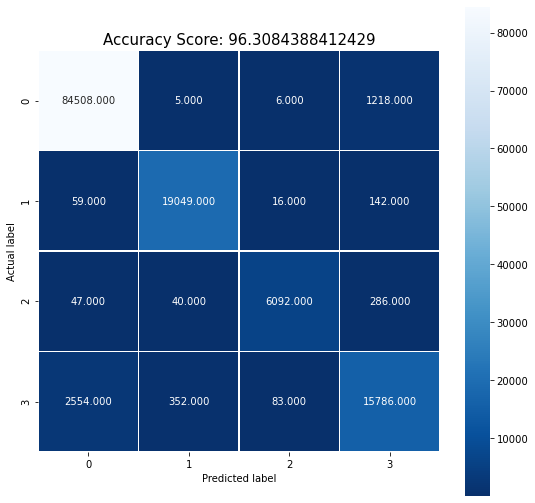

In [112]:
cm_RFClassifier = metrics.confusion_matrix(y_test, predictions_RFClassifier)

plt.figure(figsize=(9,9))
sns.heatmap(cm_RFClassifier, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title_RFClassifier = 'Accuracy Score: {0}'.format(predict_accuracy_RFClassifier)
plt.title(title_RFClassifier, size = 15);


Following the **Random Forest model**, we can see that the accuracy after CV on the train set is 92.817% and the model took around 177 seconds to run.
After predicting on test set, the accuracy of correctly classified classes is 96.30844%

### 5.4 <a class="anchor" id="5_4"></a> K-Nearest Neighbors Classifier

KNN classifier is the simplest classification algorithm [[5]](#Reference).
You can find the optimal value for k using hyperparameter tuning. 

In [114]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

KNClassifier = KNeighborsClassifier()
KNClassifier.fit(x_train,y_train)

scores_KNClassifier = sklearn.model_selection.cross_validate(
    KNClassifier, x_train, y_train,
    cv = 5, scoring = custom_scorer, n_jobs=-1)

for name in scores_KNClassifier.keys():
    average_KNClassifier = np.average(scores_KNClassifier[name])
    print('%s: %.3f' %(name,average_KNClassifier))
    

stop = time.time()

training_time_knn = stop - start
print(f"Training_time: {training_time_knn} seconds")

    

fit_time: 0.595
score_time: 774.705
test_accuracy: 0.919
test_precision: 0.909
test_recall: 0.890
Training_time: 840.4919514656067 seconds


In [115]:
#This is to be used for the confusion matrix and comparison graphs
accuracy_KNClassifier = []
precision_KNClassifier = []
recall_KNClassifier = []
for k, v in scores_KNClassifier.items():
    if k == 'test_accuracy':
        accuracy_KNClassifier.append(v.mean())
    if k == 'test_precision':
        precision_KNClassifier.append(v.mean())
    if k == 'test_recall':
        recall_KNClassifier.append(v.mean())

accuracy_KNClassifier
precision_KNClassifier
recall_KNClassifier


[0.9190454432403264]

[0.9091014872000518]

[0.8900286913161366]

Using the basic trained KNClassifier to predict on the test set.

In [360]:
#Creating a classification report with all the scores
predictions_KNClassifier = KNClassifier.predict(x_test)
print(classification_report(y_test,predictions_KNClassifier))

#Extracting only precision and recall scores to be used later on
predict_precision_KNClassifier,predict_recall_KNClassifier,fscore,support=score(y_test,predictions_KNClassifier,average='macro')
print('Precision : {:.5f}'.format(predict_precision_KNClassifier))
print('Recall    : {:.5f}'.format(predict_recall_KNClassifier))


              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85737
  defacement       0.97      0.98      0.98     19266
     malware       0.95      0.94      0.94      6465
    phishing       0.89      0.82      0.86     18775

    accuracy                           0.96    130243
   macro avg       0.95      0.93      0.94    130243
weighted avg       0.96      0.96      0.96    130243

Precision : 0.94528
Recall    : 0.93122


To better visualise how our basic KNClassifier model did on our test set, a confusion matrix is created.

In [117]:
cm4 = confusion_matrix(y_test, predictions_KNClassifier)
print(cm4)
predict_accuracy_KNClassifier = sum(np.diag(cm4))/sum(sum(cm4))*100
print('{:.5f} correctly classified after prediction on test set'.format(predict_accuracy_KNClassifier))


[[84219    27    47  1444]
 [   84 18975    52   155]
 [   68    72  6048   277]
 [ 2597   549   192 15437]]
95.72799 correctly classified after prediction on test set


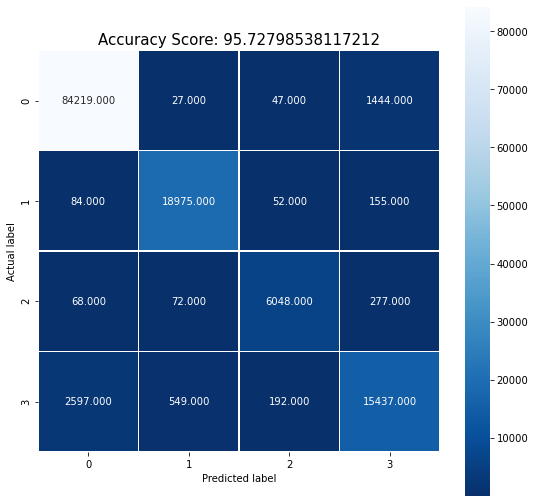

In [118]:
cm_KNClassifier = metrics.confusion_matrix(y_test, predictions_KNClassifier)

plt.figure(figsize=(9,9))
sns.heatmap(cm_KNClassifier, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title_KNClassifier = 'Accuracy Score: {0}'.format(predict_accuracy_KNClassifier)
plt.title(title_KNClassifier, size = 15);


Following the **KNN model**, we can see that the accuracy after CV on the train set is 91.9% and the model took around 840 seconds to run.
After predicting on test set, the accuracy of correctly classified classes is 95.72799%

### 5.5 <a class="anchor" id="5_5"></a> Training Scores Comparison

Now that we have got all this training information, it's important to put it all together and visualise our data to allow comparisons. 

In [189]:
accuracies = [['logisticReg', accuracy_logisticReg], 
                ['decisionTree', accuracy_decisionTree],
               ['RFClassifier', accuracy_RFClassifier],
               ['KNClassifier', accuracy_KNClassifier]]

precision = [precision_logisticReg, 
             precision_decisionTree, 
             precision_RFClassifier,
             precision_KNClassifier]

recall = [recall_logisticReg, 
          recall_decisionTree, 
          recall_RFClassifier, 
          recall_KNClassifier]


df_comparison_scores = pd.DataFrame (accuracies, 
                                     columns = ['model', 'accuracy'])
df_comparison_scores['precision'] = precision
df_comparison_scores['recall'] = recall

#removing the brackets from the values
df_comparison_scores["accuracy"] = df_comparison_scores["accuracy"].str.get(0)
df_comparison_scores["precision"] = df_comparison_scores["precision"].str.get(0)
df_comparison_scores["recall"] = df_comparison_scores["recall"].str.get(0)

df_comparison_scores

,model,accuracy,precision,recall
0,logisticReg,0.853171,0.801710,0.733953
1,decisionTree,0.920961,0.908947,0.891453
2,RFClassifier,0.928175,0.926942,0.897618
3,KNClassifier,0.919045,0.909101,0.890029


In [399]:
# pd.melt is needed in order to plot the barplot 
df_comparison_scores = pd.melt(df_comparison_scores, id_vars="model",
                               var_name="score_names", value_name="scores")
df_comparison_scores



,model,score_names,scores
0,logisticReg,accuracy,0.853171
1,decisionTree,accuracy,0.920961
2,RFClassifier,accuracy,0.928175
3,KNClassifier,accuracy,0.919045
4,logisticReg,precision,0.801710
5,decisionTree,precision,0.908947
6,RFClassifier,precision,0.926942
7,KNClassifier,precision,0.909101
8,logisticReg,recall,0.733953
9,decisionTree,recall,0.891453


Saving figure training_score_models


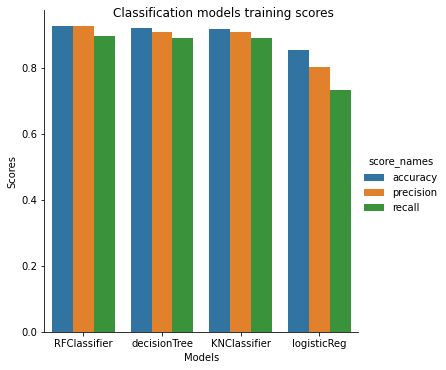

In [400]:
ax = sns.factorplot(x='model', y='scores', hue='score_names', 
                    data=df_comparison_scores, kind='bar',
                   order=['RFClassifier','decisionTree','KNClassifier',
                          'logisticReg'])

_ = ax.fig.suptitle("Classification models training scores",
                  fontsize=12, fontdict={"weight": "bold"})

_ = ax.set_axis_labels(x_var="Models", y_var="Scores")

save_fig("training_score_models")


The above barchart is ordered in a descending order based on accuracy showing that RFClassifier performed better.

Another way to compare the models is to check their training time.

In [191]:
# creating another dataframe with the training times
training_time = [['logisticReg', training_time_logistic], 
                ['decisionTree', training_time_decision],
               ['RFClassifier', training_time_rf],
               ['KNClassifier', training_time_knn]]


df_comparison_times = pd.DataFrame (training_time, 
                                    columns = ['model', 'training_time'])
df_comparison_times




,model,training_time
0,logisticReg,114.984887
1,decisionTree,20.536508
2,RFClassifier,177.430506
3,KNClassifier,840.491951


In [137]:
#source of the function: https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        

Saving figure training_time_models


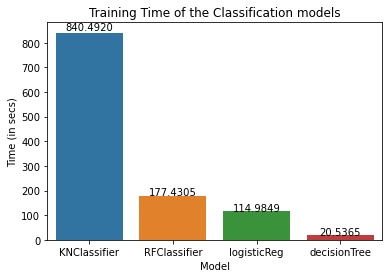

In [194]:
ax = sns.barplot(x="model", y="training_time", data=df_comparison_times,
                order=df_comparison_times.sort_values('training_time',
                                                      ascending = False).model)

_ = ax.set_xlabel("Model")
_ = ax.set_ylabel("Time (in secs)")
_ = ax.set_title("Training Time of the Classification models")


show_values(ax)
save_fig("training_time_models")


From the graph above, we can see that the KNN model took 42x more than the decision tree one and it's clearly the longest one to run.

## Section 6: <a class="anchor" id="section6"></a> Fine-tune your models and combine them into a better solution.

From the above 4 classifiers: Logistic Regression, Decision Tree, Random Forest and KNN, the best accuracy was given by the Random Forest with 0.928. Therefore, this will be the model we will focus on in order to increase its accuracy by fine-tuning it.

There are quite a few papers mentioning the top hyperparameters to focus on for the Random Forest which are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features) [[6]](#References).
However, a Random Hyperparameter Grid will be applied first to find the best parameters as it's more efficient.  

### 6.1 <a class="anchor" id="6_1"></a> Randomized Grid SearchCV

Randomized grid search is more efficient for hyper-parameter optimization than trials on a grid [[7]](#References), therefore we will start with this.<br>

First we need to create a parameter grid to sample from during the random search training. Only a few random forest parameters were chosen among the most important ones.

As the aim is to increase the accuracy of the model, the ideal solution is to increase the number of trees. This however might make our model a bit slower.

In [278]:
# source code from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = [12,16,21]
# the way it's going to split
criterion=['entropy','gini']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap':bootstrap
              }


In [227]:
# We will now use the random_grid created to search for best hyperparameters

# Our base model is already created
RFClassifier

#Applying the RandomizedSearchCV
RFClassifier_random2 = RandomizedSearchCV(estimator = RFClassifier, 
                                          param_distributions = random_grid, 
                                          n_iter = 10, 
                                         cv = 3, verbose=2, random_state=13, 
                                          n_jobs = -1)
# Fit the random search model
RFClassifier_random2.fit(x_train, y_train)



RandomForestClassifier(random_state=13)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=13),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [12, 16, 21],
                                        'n_estimators': [100, 122, 144, 166,
                                                         188, 211, 233, 255,
                                                         277, 300]},
                   random_state=13, verbose=2)

In [322]:
RFClassifier_random2.best_params_

{'n_estimators': 277,
 'max_features': 12,
 'max_depth': 70,
 'criterion': 'gini',
 'bootstrap': False}

We can observe now the best hyperparameters which we will proceed in adding them into our model to find out if the accuracy has improved compared to our basic model.

In [325]:
#accuracy of the basic RFClassifier
print("Accuracy of basic RFCLassifier training model: {}%".format(accuracy_RFClassifier))
print("Accuracy of basic RFCLassifier predicted on test model: {:.5f}%".format(predict_accuracy_RFClassifier))



Accuracy of basic RFCLassifier training model: [0.9281749526353895]%
Accuracy of basic RFCLassifier predicted on test model: 96.30844%


In [326]:
best_random_grid = RFClassifier_random2.best_estimator_
best_random_grid

RandomForestClassifier(bootstrap=False, max_depth=70, max_features=12,
                       n_estimators=277, random_state=13)

In [331]:
start = time.time()

best_random_RFClassifier = RandomForestClassifier(bootstrap=False, 
                                                  max_depth=70, 
                                                  max_features=12,
                       n_estimators=277, random_state=13, 
                                                  n_jobs=-1).fit(x_train,y_train)    
 
best_random_accuracy_rf = best_random_RFClassifier.score(x_train,y_train)    
print("Accuracy of fine-tuned RFClassifier with randomized grid search on training model: {:.5f}%".format(best_random_accuracy_rf*100))

predictions_random_rf = best_random_RFClassifier.predict(x_test)
best_random_accuracy_predict_rf = accuracy_score(y_test, predictions_random_rf)
print("Accuracy of fine-tuned RFClassifier with randomized grid search on test model: {:.5f}%".format(best_random_accuracy_predict_rf*100))


stop = time.time()

training_time_random_rf = stop - start
print("Training_time: {:.5f} seconds".format(training_time_random_rf))



Accuracy of fine-tuned RFClassifier with randomized grid search on training model: 98.08522%
Accuracy of fine-tuned RFClassifier with randomized grid search on test model: 96.27389%
Training_time: 56.58810 seconds


In order to better visualise how our fine-tuned RFClassifier model did on our test set, a confusion matrix is created.

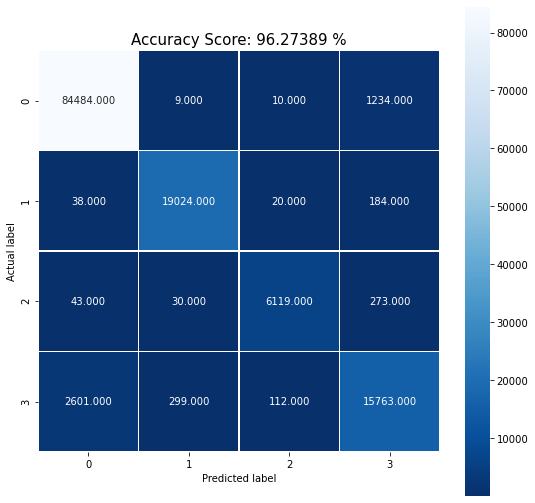

In [334]:
cm_best_random_rf = metrics.confusion_matrix(y_test, predictions_random_rf)

plt.figure(figsize=(9,9))
sns.heatmap(cm_best_random_rf, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title_best_random_rf = 'Accuracy Score: {:.5f} %'.format(best_random_accuracy_predict_rf*100)
plt.title(title_best_random_rf, size = 15);


Visualising the random forest tree based on the hypertuned parameters is a simple way to understand the node splits. For visualisation purposes, max_depth=2 was chosen rather than the optimal of 70.

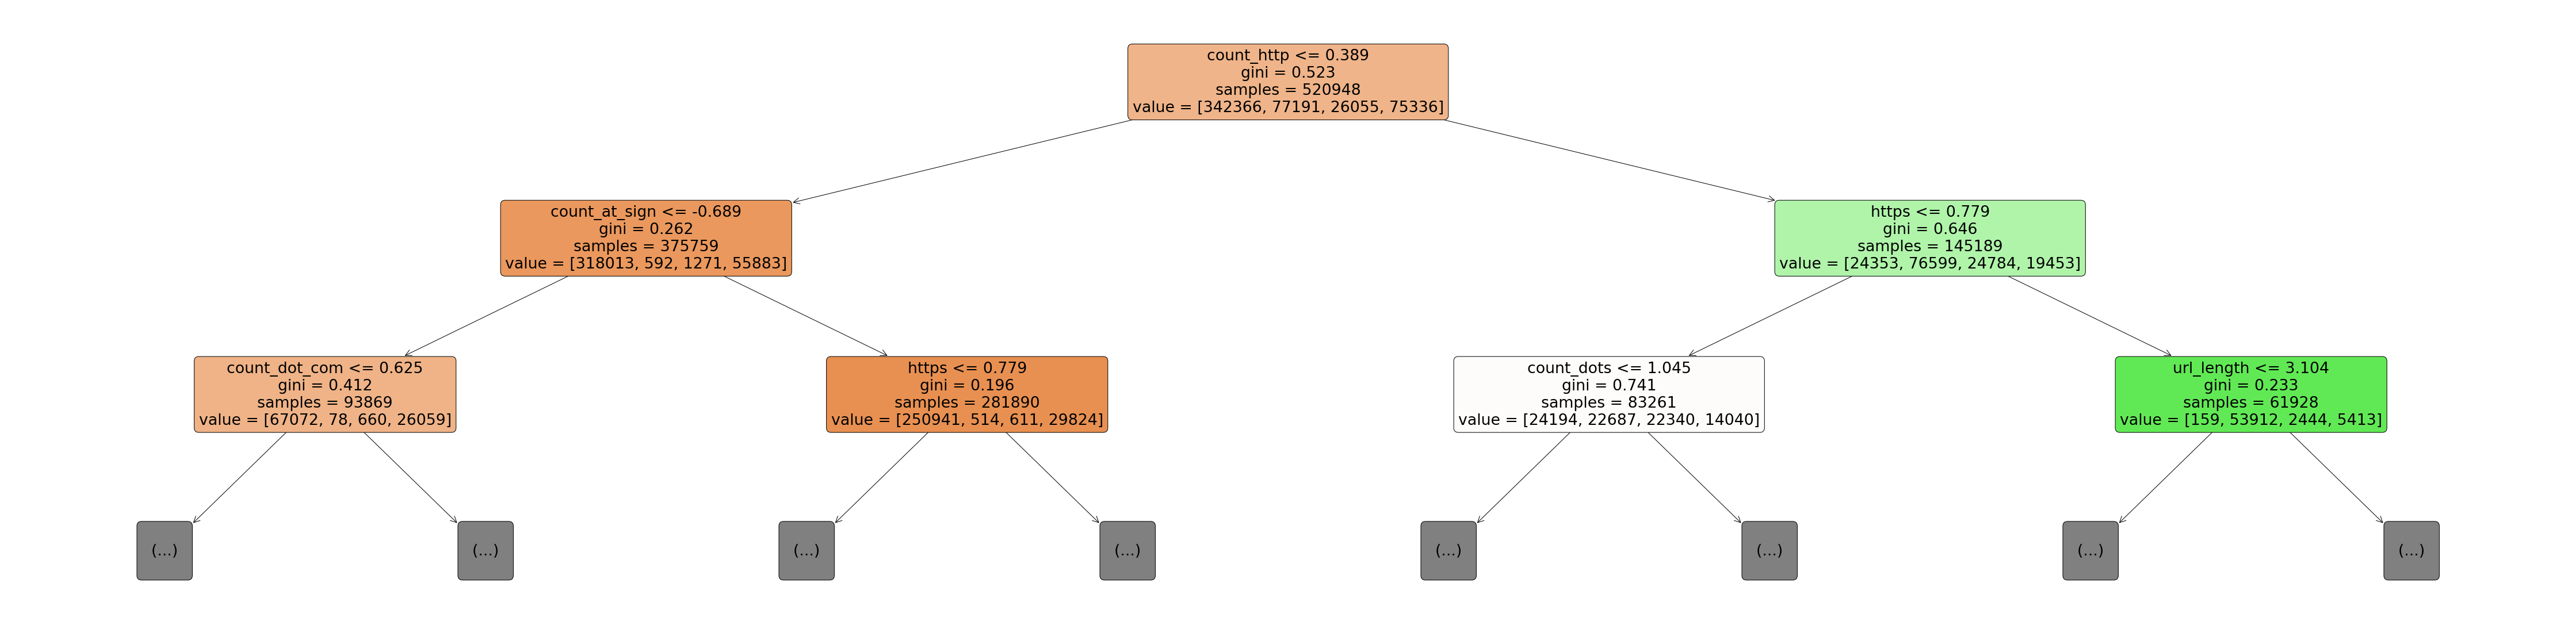

In [388]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(best_random_RFClassifier.estimators_[0], max_depth=2, 
          feature_names=train_set.columns, 
filled=True, rounded=True);


### 6.2 <a class="anchor" id="6_2"></a> GridSearchCV

Grid Search was also used to compare with the random grid search.

In [368]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,5,10],
    'max_features': [3,5,13],
    'min_samples_split': [5, 10, 13],
    'n_estimators': [100, 200, 300, 1000]
}

#our base model is:
RFClassifier

#Use GridSearchCV
grid_search_rf = GridSearchCV(estimator = RFClassifier, 
                              param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)


RandomForestClassifier(random_state=13)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'max_features': [3, 5, 13],
                         'min_samples_split': [5, 10, 13],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [372]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 13,
 'min_samples_split': 5,
 'n_estimators': 200}

We can now observe the best hyperparameters which we will proceed in adding them into our model to find out if the accuracy has improved compared to our basic model.

In [390]:
#accuracy of the basic RFClassifier
print("Accuracy of basic RFCLassifier training model: {}".format(accuracy_RFClassifier))
print("Accuracy of basic RFCLassifier predicted on test model: {:.5f}%".format(predict_accuracy_RFClassifier))



Accuracy of basic RFCLassifier training model: [0.9281749526353895]
Accuracy of basic RFCLassifier predicted on test model: 96.30844%


In [389]:
#accuracy of the RFCLassifier after fine-tuning
best_grid = grid_search_rf.best_estimator_
best_grid


RandomForestClassifier(max_depth=10, max_features=13, min_samples_split=5,
                       n_estimators=200, random_state=13)

In [341]:
start = time.time()

best_grid_RFClassifier = RandomForestClassifier(max_depth=10, max_features=13, 
                                                min_samples_split=5,
                       n_estimators=200, random_state=13, 
                                                n_jobs=-1).fit(x_train,y_train)    
 
best_grid_accuracy_rf = best_grid_RFClassifier.score(x_train,y_train)    
print("Accuracy of fine-tuned RFClassifier with grid search on training model: {:.5f}%".format(best_grid_accuracy_rf*100))

predictions_grid_rf = best_grid_RFClassifier.predict(x_test)
best_grid_accuracy_predict_rf = accuracy_score(y_test, predictions_grid_rf)
print("Accuracy of fine-tuned RFClassifier with grid search on test model: {:.5f}%".format(best_grid_accuracy_predict_rf*100))


stop = time.time()

training_time_grid_rf = stop - start
print("Training_time: {:.5f} seconds".format(training_time_grid_rf))



Accuracy of fine-tuned RFClassifier with grid search on training model: 93.98750%
Accuracy of fine-tuned RFClassifier with grid search on test model: 93.94516%
Training_time: 22.45198 seconds


In order to better visualise how our fine-tuned RFClassifier model with GridSearch did on our test set, a confusion matrix is created.

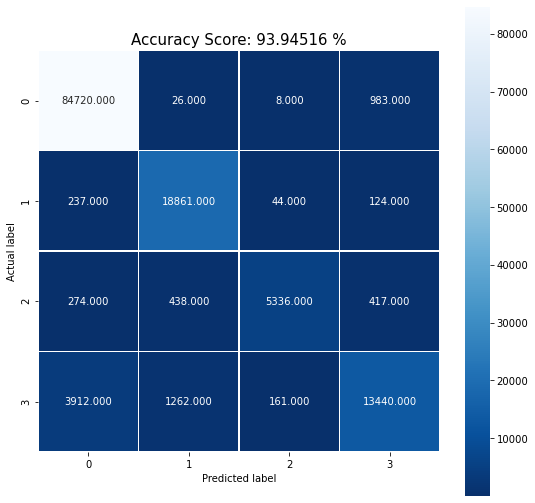

In [342]:
cm_best_grid_rf = metrics.confusion_matrix(y_test, predictions_grid_rf)

plt.figure(figsize=(9,9))
sns.heatmap(cm_best_grid_rf, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title_best_grid_rf = 'Accuracy Score: {:.5f} %'.format(best_grid_accuracy_predict_rf*100)
plt.title(title_best_grid_rf, size = 15);


### 6.3 <a class="anchor" id="6_3"></a> Voting Classifier (Ensemble)

Apart form Grid Search, another way to fine-tune the models is to combine the ones which performed better. Therefore, this ensemble tends to perform better.<br>
The models chosen are RandomForest, DecisionTree and KNN.

In [359]:
from sklearn.ensemble import VotingClassifier

classifier1 = RFClassifier
classifier2 = decisionTree
classifier3 = KNClassifier

vclassifier = VotingClassifier(
    estimators=[('rf', RFClassifier), ('dt', decisionTree), ('knn', KNClassifier)],
    voting='hard')

for classifier, label in zip([classifier1, classifier2, classifier3, vclassifier], 
                             ['Random Forest', 'Decision Tree', 'KNN', 'Ensemble']):
    scores = cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f [%s]" % (scores.mean(), label))


Accuracy: 0.93 [Random Forest]
Accuracy: 0.92 [Decision Tree]
Accuracy: 0.92 [KNN]
Accuracy: 0.93 [Ensemble]


### 6.4 <a class="anchor" id="6_4"></a> Comparison of the fine-tuned models

When comparing the basic models with the best_random and best_grid ones, we can observe that the randomized grid search performed better than the grid search and better or similar to the basic model.

In [392]:
from tabulate import tabulate
training_accuracy_table = tabulate([
    ['accuracy_RFClassifier', accuracy_RFClassifier], 
    ['best_random_accuracy_rf', best_random_accuracy_rf],
    ['best_grid_accuracy_rf', best_grid_accuracy_rf]],
               headers=['Training Model', 'Accuracy'])

print(training_accuracy_table)



Training Model           Accuracy
-----------------------  --------------------
accuracy_RFClassifier    [0.9281749526353895]
best_random_accuracy_rf  0.9808522155762187
best_grid_accuracy_rf    0.9398749971206339


In [353]:
predicted_accuracy_table = tabulate([
    ['predict_accuracy_RFClassifier', predict_accuracy_RFClassifier], 
    ['best_random_accuracy_predict_rf', best_random_accuracy_predict_rf*100],
    ['best_grid_accuracy_predict_rf', best_grid_accuracy_predict_rf*100]],
               headers=['Predicted Model', 'Accuracy'])

print(predicted_accuracy_table)

Predicted Model                    Accuracy
-------------------------------  ----------
predict_accuracy_RFClassifier       96.3084
best_random_accuracy_predict_rf     96.2739
best_grid_accuracy_predict_rf       93.9452


When we combine all the 3 models together, the ensemble performs very well too.

In [393]:
accuracy_basic_ensemble = tabulate([
    ['accuracy_Random_Forest', 0.93], 
    ['accuracy_Decision_Tree', 0.92],
    ['accuracy_KNN', 0.92],
    ['accuracy_Ensemble', 0.93],],
               headers=['Model', 'Accuracy'])

print(accuracy_basic_ensemble)

Model                     Accuracy
----------------------  ----------
accuracy_Random_Forest        0.93
accuracy_Decision_Tree        0.92
accuracy_KNN                  0.92
accuracy_Ensemble             0.93


## Section 7: <a class="anchor" id="section7"></a> Present your final solution with any summary conclusions.

To summarize, what was done in this project was to obtain a dataset regarding malicious/bening URLs, explored the data to gain insights, cleaned it, explored different ML models, fine-tuned the models which performed better and combined them into a better solution.<br><br>
The minimum performance neeeded to reach the business objective was to obtain an accuracy of 85%. This was successfully achieved with an accuracy score of 96.3% from both basic random forest model and the randomized grid search for random forest.<br><br>
The next step of this project would be to create a UI where users can put a URL to check its type and the code and research of this project will be used as the backend algorithm. 

## <a class="anchor" id="References"></a> References

[1] E. Segal, “How Cyber Thieves Are Ramping Up Their Phishing Attacks Against Companies And Organizations,” Forbes, 11-Nov-2021 [Online]. Available: https://www.forbes.com/sites/edwardsegal/2021/11/11/how-cyber-thieves-are-ramping-up-their-phishing-attacks-against-companies-and-organizations/. [Accessed: 10-Feb-2022]

[2] Manu Siddhartha, “Malicious URLs dataset,” Kaggle.com, 2016. [Online]. Available: https://www.kaggle.com/sid321axn/malicious-urls-dataset. [Accessed: 10-Feb-2022]

[3]
L. with, “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition,” O’Reilly Online Learning, 2019. [Online]. Available: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/. [Accessed: 03-Mar-2022]

[4] A. Raj, “Perfect Recipe for Classification Using Logistic Regression,” Medium, 07-Nov-2020. [Online]. Available: https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Logistic%20regression%20is%20easier%20to,as%20indicators%20of%20feature%20importance.. [Accessed: 03-Mar-2022]

[5] Altman, N., 1992. An Introduction to Kernel and Nearest-Neighbor Nonparametric Regression. The American Statistician, 46(3), p.175.

[6] L. Breiman, “Random Forests,” 2001 [Online]. Available: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

[7] J. Bergstra, J. Ca, and Y. Ca, “Random Search for Hyper-Parameter Optimization Yoshua Bengio,” Journal of Machine Learning Research, vol. 13, pp. 281–305, 2012 [Online]. Available: https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf


